# Treating 2 Loan Datasets

**Datasets 1 and 2 are loan datasets including variables about the clients and about the loans**

**All decisions reagrding data treatment were taken by the author of this notebook. Some of them could vary in a real world example as it would be better if the businees team would clarify some information**  

## Imports and Ignoring Warnings

In [1]:
import numpy as np

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

## Numpy Output Options

In [2]:
np.set_printoptions(suppress = True, linewidth = 200, precision = 2)

# Working with Dataset 1

In [3]:
data = np.genfromtxt("dados/dataset1.csv", delimiter = ';', skip_header = 1, autostrip = True, encoding = 'cp1252')

In [4]:
data.shape

(10000, 14)

In [5]:
data.view()

array([[48010226.  ,         nan,    35000.  , ...,         nan,         nan,     9452.96],
       [57693261.  ,         nan,    30000.  , ...,         nan,         nan,     4679.7 ],
       [59432726.  ,         nan,    15000.  , ...,         nan,         nan,     1969.83],
       ...,
       [50415990.  ,         nan,    10000.  , ...,         nan,         nan,     2185.64],
       [46154151.  ,         nan,         nan, ...,         nan,         nan,     3199.4 ],
       [66055249.  ,         nan,    10000.  , ...,         nan,         nan,      301.9 ]])

**we can observe that many columns have missing values**

**Opening our dataset, we can see that the missing values (or at least part of them) seem to be the columns with string type of data**


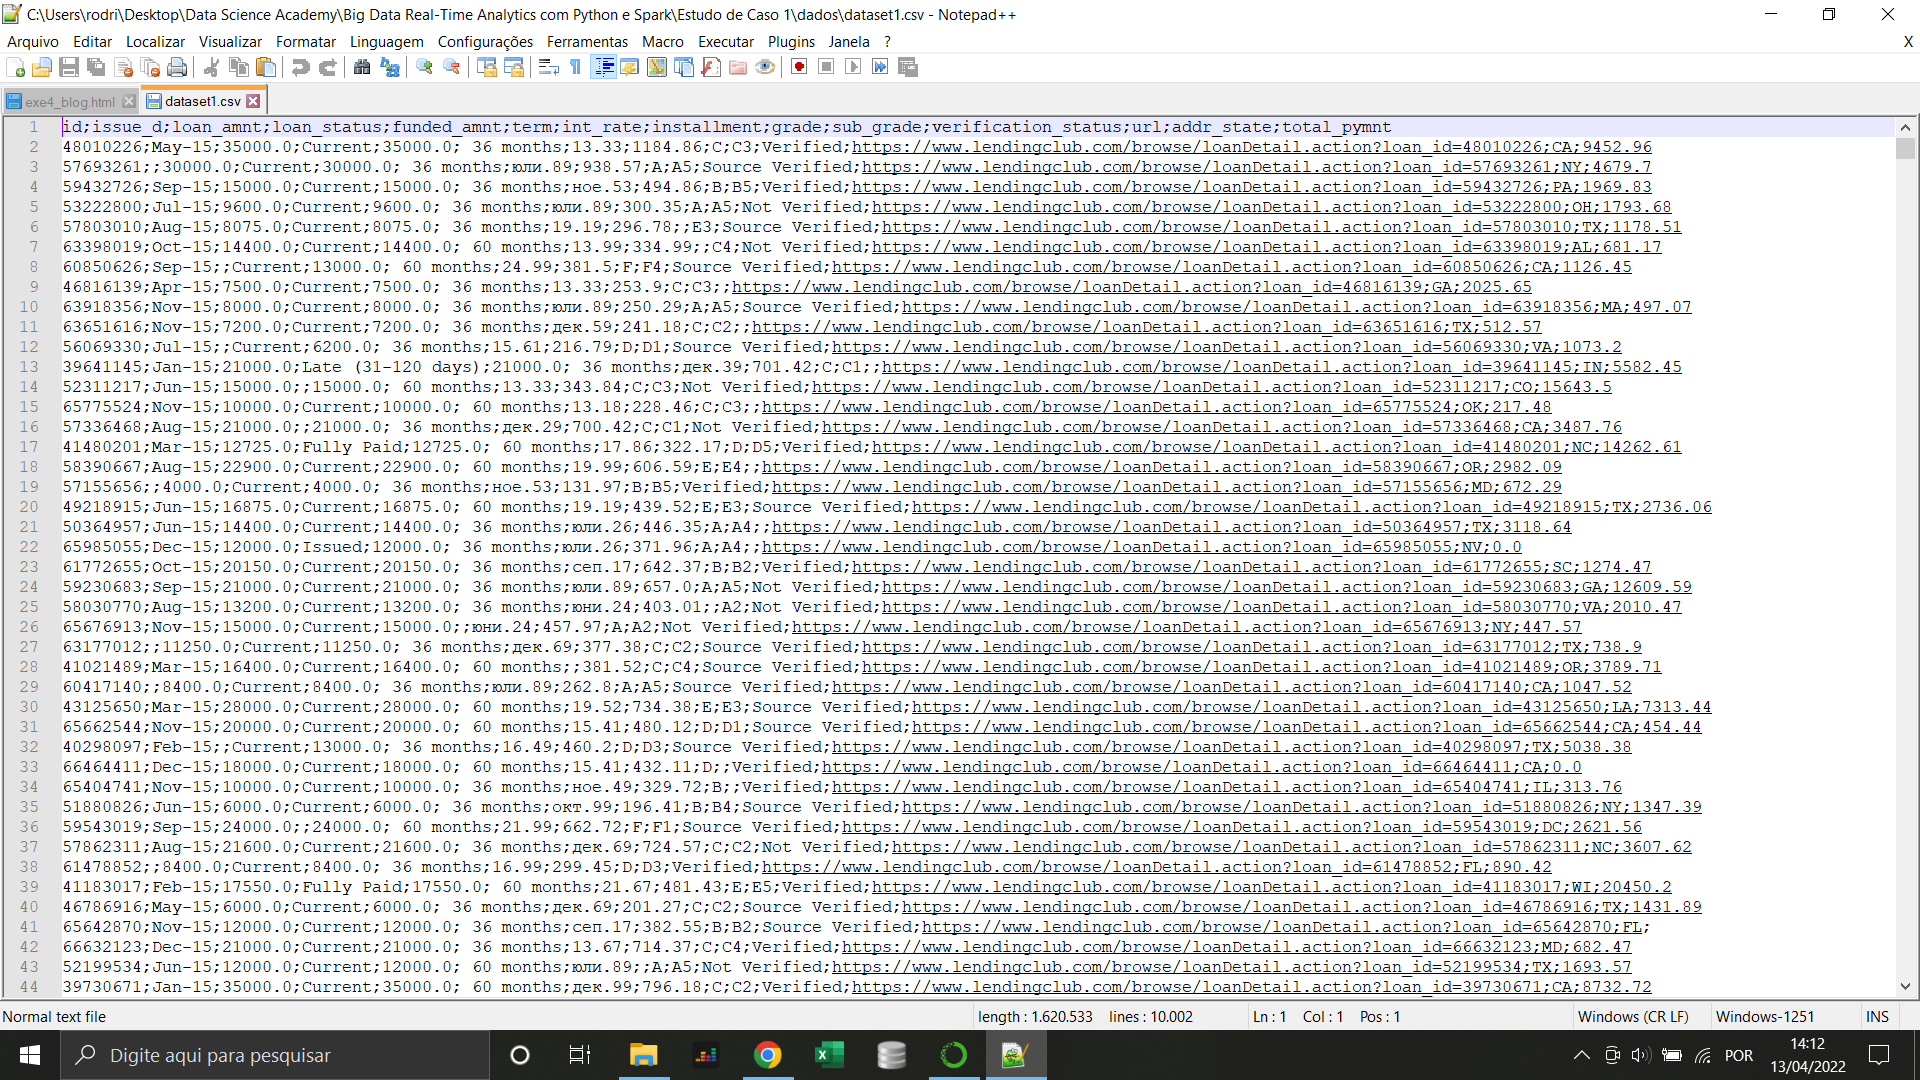

In [6]:
Image(filename='dataset1_notepad.png') 

## Checking and Treating Missing Values

In [7]:
np.isnan(data).sum()

88005

In [8]:
#generating an arbitrary value to fill numeric missing values
arbt_value = np.nanmax(data) + 1
arbt_value

68616520.0

In [9]:
nan_mean = np.nanmean(data,axis=0)
nan_mean

array([54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,      440.92,         nan,         nan,         nan,         nan,         nan,     3143.85])

In [10]:
#separating string and numeric columns
string_cols = np.argwhere(np.isnan(nan_mean)).squeeze()
print("String Columns:", string_cols)

num_cols = np.argwhere(np.isnan(nan_mean) == False).squeeze()
print("Numeric Columns:",num_cols)

String Columns: [ 1  3  5  8  9 10 11 12]
Numeric Columns: [ 0  2  4  6  7 13]


In [11]:
#Loading only string columns from the dataset
array_str = np.genfromtxt("dados/dataset1.csv", delimiter = ';', skip_header = 1, autostrip = True,
                     usecols = string_cols, dtype = str, encoding = 'cp1252')
array_str

array([['May-15', 'Current', '36 months', ..., 'Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']], dtype='<U69')

In [12]:
#Loading only numeric columns from the dataset
array_num = np.genfromtxt("dados/dataset1.csv", delimiter = ';', skip_header = 1, autostrip = True,
                         usecols = num_cols, filling_values = arbt_value, encoding = 'cp1252')
array_num

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]])

In [13]:
#Loading columns headers
col_names = np.genfromtxt("dados/dataset1.csv", delimiter = ';', autostrip = True, skip_footer = data.shape[0],
                          dtype = str, encoding = 'cp1252')

col_names

array(['id', 'issue_d', 'loan_amnt', 'loan_status', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state', 'total_pymnt'], dtype='<U19')

In [14]:
#Separating Headers by types
header_strings, header_numeric = col_names[string_cols], col_names[num_cols]

In [15]:
print("String Colmumns' Headers:", header_strings, end = '\n\n')

print("Numeric Colmumns' Headers:", header_numeric)

String Colmumns' Headers: ['issue_d' 'loan_status' 'term' 'grade' 'sub_grade' 'verification_status' 'url' 'addr_state']

Numeric Colmumns' Headers: ['id' 'loan_amnt' 'funded_amnt' 'int_rate' 'installment' 'total_pymnt']


## Manipulating String Columns

In [16]:
header_strings

array(['issue_d', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

In [17]:
header_strings[0] = "issue_date"
header_strings

array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

### Pre-processing variables 

#### Pre-processing issue_date variable with Label Encoding

In [18]:
np.unique(array_str[:,0])

array(['', 'Apr-15', 'Aug-15', 'Dec-15', 'Feb-15', 'Jan-15', 'Jul-15', 'Jun-15', 'Mar-15', 'May-15', 'Nov-15', 'Oct-15', 'Sep-15'], dtype='<U69')

In [19]:
array_str[:,0] = np.chararray.strip(array_str[:,0],"-15")

In [20]:
np.unique(array_str[:,0])

array(['', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'], dtype='<U69')

In [21]:
months = np.array(['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [22]:
for i in range(13):
    array_str[:,0] = np.where(array_str[:,0] == months[i], i , array_str[:,0])

In [23]:
np.unique(array_str[:,0])

array(['0', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U69')

#### Pre-processing loan_status variable through binarization

In [24]:
header_strings[1]

'loan_status'

In [25]:
np.unique(array_str[:,1])

array(['', 'Charged Off', 'Current', 'Default', 'Fully Paid', 'In Grace Period', 'Issued', 'Late (16-30 days)', 'Late (31-120 days)'], dtype='<U69')

In [26]:
np.unique(array_str[:,1]).size

9

In [27]:
#Creating a variable to check if the loan_status is bad or not
status_bad = np.array([' ', 'Charged Off', 'Default', 'Late (31-120 days)'])

In [28]:
array_str[:,1] = np.where(np.isin(array_str[:,1],status_bad),0,1)

In [29]:
np.unique(array_str[:,1])

array(['0', '1'], dtype='<U69')

#### Pre-processing term variable with string cleaning

In [30]:
header_strings

array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

In [31]:
array_str[:,2]

array(['36 months', '36 months', '36 months', ..., '36 months', '36 months', '36 months'], dtype='<U69')

In [32]:
np.unique(array_str[:,2])

array(['', '36 months', '60 months'], dtype='<U69')

In [33]:
#Removing  " months" from the variable
array_str[:,2] = np.chararray.strip(array_str[:,2], " months")

In [34]:
header_strings[2] = "term_months"

In [35]:
#Replacing missing values by the max value (60) because it is the term to pay the debt, so 0 wouldn't make sense
array_str[:,2] = np.where(array_str[:,2] == '','60',array_str[:,2])

In [36]:
np.unique(array_str[:,2])

array(['36', '60'], dtype='<U69')

#### Pre-processing grade and sub_grade variables with dictionaries

In [37]:
header_strings[3:5]

array(['grade', 'sub_grade'], dtype='<U19')

In [38]:
np.unique(array_str[:,3])

array(['', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='<U69')

In [39]:
np.unique(array_str[:,4])

array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5'], dtype='<U69')

**As we can see, grade and sub_grade are very similar columns. So, we are going to keep sub_grade as it is more detailed**

**Another note is that the missing values are going to be replaced by a new sub_grade (H1)**

In [40]:
np.unique(array_str[:,3])[1:]

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='<U69')

In [41]:
for i in np.unique(array_str[:,3][1:]):
    array_str[:,4] = np.where((array_str[:,4] == '') & (array_str[:,3] == i), i + '5', array_str[:,4])

In [42]:
np.unique(array_str[:,4],return_counts = True)

(array(['5', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
        'G2', 'G3', 'G4', 'G5'], dtype='<U69'),
 array([  9, 285, 278, 239, 323, 592, 509, 517, 530, 553, 633, 629, 567, 586, 564, 577, 391, 267, 250, 255, 288, 235, 162, 171, 139, 160,  94,  52,  34,  43,  24,  19,  10,   3,   7,   5], dtype=int64))

In [43]:
array_str[:,4] = np.where(array_str[:,4] == '5','H1',array_str[:,4])

In [44]:
np.unique(array_str[:,4])

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'H1'], dtype='<U69')

**Now we can delete the variable "grade" and keep the variable "sub_grade"**

In [45]:
array_str = np.delete(array_str,3,axis=1)

In [46]:
array_str[:,3]

array(['C3', 'A5', 'B5', ..., 'A5', 'D2', 'A4'], dtype='<U69')

In [47]:
header_strings = np.delete(header_strings,3)

In [48]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

**And finally, the objective now is to transform the sub_grade values into numeric**

In [49]:
np.unique(array_str[:,3])

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'H1'], dtype='<U69')

In [50]:
keys = list(np.unique(array_str[:,3]))

In [51]:
keys

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'H1']

In [52]:
values = list(range(1,np.unique(array_str[:,3]).shape[0] + 1))

In [53]:
values

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

In [54]:
dict_sub_grade = dict(zip(keys,values))

In [55]:
dict_sub_grade

{'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'B1': 6,
 'B2': 7,
 'B3': 8,
 'B4': 9,
 'B5': 10,
 'C1': 11,
 'C2': 12,
 'C3': 13,
 'C4': 14,
 'C5': 15,
 'D1': 16,
 'D2': 17,
 'D3': 18,
 'D4': 19,
 'D5': 20,
 'E1': 21,
 'E2': 22,
 'E3': 23,
 'E4': 24,
 'E5': 25,
 'F1': 26,
 'F2': 27,
 'F3': 28,
 'F4': 29,
 'F5': 30,
 'G1': 31,
 'G2': 32,
 'G3': 33,
 'G4': 34,
 'G5': 35,
 'H1': 36}

In [56]:
for i in np.unique(array_str[:,3]):
    array_str[:,3] = np.where(array_str[:,3] == i,dict_sub_grade[i],array_str[:,3])

In [57]:
np.unique(array_str[:,3])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '4', '5', '6',
       '7', '8', '9'], dtype='<U69')

#### Pre-processing verification_status variable with binarization

In [58]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

In [59]:
np.unique(array_str[:,4])

array(['', 'Not Verified', 'Source Verified', 'Verified'], dtype='<U69')

In [60]:
array_str[:,4] = np.where((array_str[:,4] == '') | (array_str[:,4] == 'Not Verified'),0,1)

In [61]:
np.unique(array_str[:,4])

array(['0', '1'], dtype='<U69')

#### Pre-processing url variable with ID extraction

In [62]:
header_strings[5]

'url'

In [63]:
np.unique(array_str[:,5])

array(['https://www.lendingclub.com/browse/loanDetail.action?loan_id=12606806', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=13026045',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1312426', ..., 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=8138291',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=8214572', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=849994'], dtype='<U69')

In [64]:
array_str[:,5] = np.chararray.strip(array_str[:,5],"https://www.lendingclub.com/browse/loanDetail.action?loan_id=")

In [65]:
np.unique(array_str[:,5])

array(['12606806', '13026045', '1312426', ..., '8138291', '8214572', '849994'], dtype='<U69')

**There is a numeric variable called id, which seems very similar to these id we're extracting from the url variable**

In [66]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

In [67]:
array_num[:,0]

array([48010226., 57693261., 59432726., ..., 50415990., 46154151., 66055249.])

**Checking if the variables are identical**

In [68]:
array_str[:,5].astype(dtype = np.int32)

array([48010226, 57693261, 59432726, ..., 50415990, 46154151, 66055249])

In [69]:
array_num[:,0].astype(dtype = np.int32)

array([48010226, 57693261, 59432726, ..., 50415990, 46154151, 66055249])

In [70]:
np.array_equal(array_num[:,0].astype(dtype = np.int32), array_str[:,5].astype(dtype = np.int32))

True

**As the variables are identical, the url variable is no longer useful. Therefore, it will be deleted**

In [71]:
array_str = np.delete(array_str,5,axis=1)

In [72]:
header_strings = np.delete(header_strings,5)

In [73]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'addr_state'], dtype='<U19')

#### Pre-processing address variable with categorization

In [74]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'addr_state'], dtype='<U19')

In [75]:
header_strings[5] = "state_address"

In [76]:
np.unique(array_str[:,5])

array(['', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U69')

In [77]:
#Extracting states' names and counts
states_names, states_counts = np.unique(array_str[:,5],return_counts = True)

In [78]:
states_names

array(['', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U69')

In [79]:
states_counts

array([ 500,   26,  119,   74,  220, 1336,  201,  143,   27,   27,  690,  321,   44,  389,  152,   84,   84,  116,  210,  222,   10,  267,  156,  160,   61,   28,  261,   16,   25,   58,  341,   57,
        130,  777,  312,   83,  108,  320,   40,  107,   24,  143,  758,   74,  242,   17,  216,  148,   49,   27], dtype=int64)

In [80]:
#Arranging them in descending order
states_counts_sorted = np.argsort(-states_counts)

In [81]:
states_names[states_counts_sorted],states_counts[states_counts_sorted]

(array(['CA', 'NY', 'TX', 'FL', '', 'IL', 'NJ', 'GA', 'PA', 'OH', 'MI', 'NC', 'VA', 'MD', 'AZ', 'WA', 'MA', 'CO', 'MO', 'MN', 'IN', 'WI', 'CT', 'TN', 'NV', 'AL', 'LA', 'OR', 'SC', 'KY', 'KS', 'OK',
        'UT', 'AR', 'MS', 'NH', 'NM', 'WV', 'HI', 'RI', 'MT', 'DE', 'DC', 'WY', 'AK', 'NE', 'SD', 'VT', 'ND', 'ME'], dtype='<U69'),
 array([1336,  777,  758,  690,  500,  389,  341,  321,  320,  312,  267,  261,  242,  222,  220,  216,  210,  201,  160,  156,  152,  148,  143,  143,  130,  119,  116,  108,  107,   84,   84,   83,
          74,   74,   61,   58,   57,   49,   44,   40,   28,   27,   27,   27,   26,   25,   24,   17,   16,   10], dtype=int64))

In [82]:
#Replacing missing values by 0
array_str[:,5] = np.where(array_str[:,5] == '', 0, array_str[:,5])

**The decision here was to divide the US states according to their regions**

https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

In [83]:
states_west = np.array(['WA', 'OR','CA','NV','ID','MT', 'WY','UT','CO', 'AZ','NM','HI','AK'])
states_south = np.array(['TX','OK','AR','LA','MS','AL','TN','KY','FL','GA','SC','NC','VA','WV','MD','DE','DC'])
states_midwest = np.array(['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH'])
states_east = np.array(['PA','NY','NJ','CT','MA','VT','NH','ME','RI'])

In [84]:
array_str[:,5] = np.where(np.isin(array_str[:,5],states_west), 1, array_str[:,5])
array_str[:,5] = np.where(np.isin(array_str[:,5],states_south), 2, array_str[:,5])
array_str[:,5] = np.where(np.isin(array_str[:,5],states_midwest), 3, array_str[:,5])
array_str[:,5] = np.where(np.isin(array_str[:,5],states_east), 4, array_str[:,5])

In [85]:
np.unique(array_str[:,5])

array(['0', '1', '2', '3', '4'], dtype='<U69')

## Converting array_str to int type

In [86]:
array_str

array([['5', '1', '36', '13', '1', '1'],
       ['0', '1', '36', '5', '1', '4'],
       ['9', '1', '36', '10', '1', '4'],
       ...,
       ['6', '1', '36', '5', '1', '1'],
       ['4', '1', '36', '17', '1', '3'],
       ['12', '1', '36', '4', '0', '3']], dtype='<U69')

In [87]:
array_str = array_str.astype(int)

In [88]:
array_str

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]])

In [89]:
array_str.dtype

dtype('int32')

## Checkpoint

In [90]:
def checkpoint(file_name, checkpoint_header, checkpoint_data):
    np.savez(file_name, header = checkpoint_header, data = checkpoint_data)
    checkpoint_variable = np.load(file_name + ".npz")
    return(checkpoint_variable)

In [91]:
checkpoint_strings = checkpoint("dados/checkpoint-strings", header_strings, array_str)

In [92]:
checkpoint_strings['header']

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'state_address'], dtype='<U19')

In [93]:
checkpoint_strings['data']

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]])

In [94]:
np.array_equal(checkpoint_strings['data'],array_str)

True

## Manipulating Numeric Columns

In [95]:
array_num

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]])

In [96]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

In [97]:
np.isnan(array_num).sum()

0

**There are no missing values due to the fact that an arbitrary value was used to fill them**

In [98]:
arbt_value

68616520.0

In [99]:
np.isin(array_num[:,0],arbt_value).sum()

0

**An array of statistics will be created so it can be used to treat arbitrary values**

In [100]:
array_stats = np.array([np.nanmin(data,axis = 0),nan_mean,np.nanmax(data, axis = 0)])

In [101]:
array_stats

array([[  373332.  ,         nan,     1000.  ,         nan,     1000.  ,         nan,        6.  ,       31.42,         nan,         nan,         nan,         nan,         nan,        0.  ],
       [54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,      440.92,         nan,         nan,         nan,         nan,         nan,     3143.85],
       [68616519.  ,         nan,    35000.  ,         nan,    35000.  ,         nan,       28.99,     1372.97,         nan,         nan,         nan,         nan,         nan,    41913.62]])

In [102]:
array_stats[:,num_cols]

array([[  373332.  ,     1000.  ,     1000.  ,        6.  ,       31.42,        0.  ],
       [54015809.19,    15273.46,    15311.04,       16.62,      440.92,     3143.85],
       [68616519.  ,    35000.  ,    35000.  ,       28.99,     1372.97,    41913.62]])

### Pre-processing Variables

#### Pre_processing funded_amnt variable

In [103]:
array_num[:,2]

array([35000., 30000., 15000., ..., 10000., 10000., 10000.])

In [104]:
array_stats[0,num_cols[2]]

1000.0

In [105]:
array_num[:,2] = np.where(array_num[:,2] == arbt_value, array_stats[0,num_cols[2]],array_num[:,2])

In [106]:
array_num[:,2]

array([35000., 30000., 15000., ..., 10000., 10000., 10000.])

#### Pre-processing int_rate, installment, total_pymnt variables

In [107]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

In [108]:
for i in 1,3,4,5:
    array_num[:,i] = np.where(array_num[:,i] == arbt_value, array_stats[2,num_cols[i]],array_num[:,i])

In [109]:
array_num

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  ,       28.99,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  ,       28.99,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  ,       28.99,     1372.97,     2185.64],
       [46154151.  ,    35000.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  ,       28.99,      309.97,      301.9 ]])

# Working with Dataset 2

## Loading Dataset 2

In [110]:
data_exch = np.genfromtxt ("dados/dataset2.csv", delimiter = ',', autostrip = True, skip_header = 1, usecols = 3)

In [111]:
data_exch

array([1.13, 1.12, 1.08, 1.11, 1.1 , 1.12, 1.09, 1.13, 1.13, 1.1 , 1.06, 1.09])

In [112]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'state_address'], dtype='<U19')

In [113]:
array_str

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]])

## Creating an Exchange Rate Column and adding it to the Arrays

In [114]:
exchange_rate = array_str[:,0]

In [115]:
exchange_rate

array([ 5,  0,  9, ...,  6,  4, 12])

In [116]:
## Loop intended to fill exchnage_rate with the rate corresponding to the correct month
for i in range(1,13):
    exchange_rate = np.where(exchange_rate == i, data_exch[i - 1],exchange_rate)

In [117]:
exchange_rate

array([1.1 , 0.  , 1.13, ..., 1.12, 1.11, 1.09])

In [118]:
## Filling 0s by the mean of the exchange rate
exchange_rate = np.where(exchange_rate == 0, np.mean(data_exch), exchange_rate)

In [119]:
exchange_rate

array([1.1 , 1.11, 1.13, ..., 1.12, 1.11, 1.09])

In [120]:
exchange_rate.shape

(10000,)

In [121]:
array_num.shape

(10000, 6)

In [122]:
exchange_rate = np.reshape(exchange_rate, (10000,1))

In [123]:
# Concatenating Arrays
array_num = np.hstack((array_num, exchange_rate))

In [124]:
# Including an Exchange Rate Column into the header array
header_numeric = np.concatenate ((header_numeric, np.array(['exchange_rate'])))

In [125]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'exchange_rate'], dtype='<U19')

## Creating Columns in Dollar and in Euro

In [126]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'exchange_rate'], dtype='<U19')

In [127]:
# Columns in Dollar
cols_dollar = np.array([1,2,4,5])

In [128]:
# Visualizing Exchange Rate
array_num[:,6]

array([1.1 , 1.11, 1.13, ..., 1.12, 1.11, 1.09])

In [129]:
array_num.shape

(10000, 7)

In [130]:
# Loop to apply the exhange rate to the dollar columns 
for i in cols_dollar:
    array_num = np.hstack((array_num, np.reshape(array_num[:,i] / array_num[:,6],(10000,1))))    

In [131]:
array_num.shape

(10000, 11)

In [132]:
array_num

array([[48010226.  ,    35000.  ,    35000.  , ...,    31933.3 ,     1081.04,     8624.69],
       [57693261.  ,    30000.  ,    30000.  , ...,    27132.46,      848.86,     4232.39],
       [59432726.  ,    15000.  ,    15000.  , ...,    13326.3 ,      439.64,     1750.04],
       ...,
       [50415990.  ,    10000.  ,    10000.  , ...,     8910.3 ,     1223.36,     1947.47],
       [46154151.  ,    35000.  ,    10000.  , ...,     8997.4 ,      318.78,     2878.63],
       [66055249.  ,    10000.  ,    10000.  , ...,     9145.8 ,      283.49,      276.11]])

### Adjusting the Header ( Differentiating Dollar and EURO Columns)

In [133]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'exchange_rate'], dtype='<U19')

In [134]:
header_additional = np.array([column_name + '_EUR' for column_name in header_numeric[cols_dollar]]) 

In [135]:
header_additional

array(['loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'], dtype='<U15')

In [136]:
header_numeric = np.concatenate((header_numeric, header_additional))

In [137]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'exchange_rate', 'loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'], dtype='<U19')

In [138]:
header_numeric[cols_dollar] = np.array([column_name + '_USD' for column_name in header_numeric[cols_dollar]])

In [139]:
header_numeric

array(['id', 'loan_amnt_USD', 'funded_amnt_USD', 'int_rate', 'installment_USD', 'total_pymnt_USD', 'exchange_rate', 'loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'],
      dtype='<U19')

In [140]:
columns_index_order = [0,1,7,2,8,3,4,9,5,10,6]

In [141]:
header_numeric = header_numeric[columns_index_order]

In [142]:
header_numeric

array(['id', 'loan_amnt_USD', 'loan_amnt_EUR', 'funded_amnt_USD', 'funded_amnt_EUR', 'int_rate', 'installment_USD', 'installment_EUR', 'total_pymnt_USD', 'total_pymnt_EUR', 'exchange_rate'],
      dtype='<U19')

In [143]:
array_num

array([[48010226.  ,    35000.  ,    35000.  , ...,    31933.3 ,     1081.04,     8624.69],
       [57693261.  ,    30000.  ,    30000.  , ...,    27132.46,      848.86,     4232.39],
       [59432726.  ,    15000.  ,    15000.  , ...,    13326.3 ,      439.64,     1750.04],
       ...,
       [50415990.  ,    10000.  ,    10000.  , ...,     8910.3 ,     1223.36,     1947.47],
       [46154151.  ,    35000.  ,    10000.  , ...,     8997.4 ,      318.78,     2878.63],
       [66055249.  ,    10000.  ,    10000.  , ...,     9145.8 ,      283.49,      276.11]])

In [144]:
array_num = array_num[:,columns_index_order]

In [145]:
array_num

array([[48010226.  ,    35000.  ,    31933.3 , ...,     9452.96,     8624.69,        1.1 ],
       [57693261.  ,    30000.  ,    27132.46, ...,     4679.7 ,     4232.39,        1.11],
       [59432726.  ,    15000.  ,    13326.3 , ...,     1969.83,     1750.04,        1.13],
       ...,
       [50415990.  ,    10000.  ,     8910.3 , ...,     2185.64,     1947.47,        1.12],
       [46154151.  ,    35000.  ,    31490.9 , ...,     3199.4 ,     2878.63,        1.11],
       [66055249.  ,    10000.  ,     9145.8 , ...,      301.9 ,      276.11,        1.09]])

## Pre-processing int_rate variable

In [146]:
array_num[:,5]

array([13.33, 28.99, 28.99, ..., 28.99, 16.55, 28.99])

In [147]:
array_num[:,5] = array_num[:,5] / 100

In [148]:
array_num[:,5]

array([0.13, 0.29, 0.29, ..., 0.29, 0.17, 0.29])

## Checkpoint After Treating Numeric Variables

In [149]:
checkpoint_numeric = checkpoint('dados/Checkpoint-Numeric', header_numeric, array_num)

In [150]:
checkpoint_numeric['header'], checkpoint_numeric['data']

(array(['id', 'loan_amnt_USD', 'loan_amnt_EUR', 'funded_amnt_USD', 'funded_amnt_EUR', 'int_rate', 'installment_USD', 'installment_EUR', 'total_pymnt_USD', 'total_pymnt_EUR', 'exchange_rate'],
       dtype='<U19'),
 array([[48010226.  ,    35000.  ,    31933.3 , ...,     9452.96,     8624.69,        1.1 ],
        [57693261.  ,    30000.  ,    27132.46, ...,     4679.7 ,     4232.39,        1.11],
        [59432726.  ,    15000.  ,    13326.3 , ...,     1969.83,     1750.04,        1.13],
        ...,
        [50415990.  ,    10000.  ,     8910.3 , ...,     2185.64,     1947.47,        1.12],
        [46154151.  ,    35000.  ,    31490.9 , ...,     3199.4 ,     2878.63,        1.11],
        [66055249.  ,    10000.  ,     9145.8 , ...,      301.9 ,      276.11,        1.09]]))

## Building The Final Dataset

In [151]:
checkpoint_strings['data'].shape

(10000, 6)

In [152]:
checkpoint_numeric['data'].shape

(10000, 11)

In [153]:
df_final = np.hstack((checkpoint_numeric['data'], checkpoint_strings['data']))

In [154]:
df_final

array([[48010226.  ,    35000.  ,    31933.3 , ...,       13.  ,        1.  ,        1.  ],
       [57693261.  ,    30000.  ,    27132.46, ...,        5.  ,        1.  ,        4.  ],
       [59432726.  ,    15000.  ,    13326.3 , ...,       10.  ,        1.  ,        4.  ],
       ...,
       [50415990.  ,    10000.  ,     8910.3 , ...,        5.  ,        1.  ,        1.  ],
       [46154151.  ,    35000.  ,    31490.9 , ...,       17.  ,        1.  ,        3.  ],
       [66055249.  ,    10000.  ,     9145.8 , ...,        4.  ,        0.  ,        3.  ]])

In [155]:
# Checking missing values
np.isnan(df_final).sum()

0

In [156]:
# Concatenating Headers
header_full = np.concatenate((checkpoint_numeric['header'], checkpoint_strings['header']))

In [157]:
# Ordering the final dataset
df_final = df_final[np.argsort(df_final[:,0])]

In [158]:
df_final

array([[  373332.  ,     9950.  ,     9038.08, ...,       21.  ,        0.  ,        1.  ],
       [  575239.  ,    12000.  ,    10900.2 , ...,       25.  ,        1.  ,        2.  ],
       [  707689.  ,    10000.  ,     8924.3 , ...,       13.  ,        1.  ,        0.  ],
       ...,
       [68614880.  ,     5600.  ,     5121.65, ...,        8.  ,        1.  ,        1.  ],
       [68615915.  ,     4000.  ,     3658.32, ...,       10.  ,        1.  ,        2.  ],
       [68616519.  ,    21600.  ,    19754.93, ...,        3.  ,        0.  ,        2.  ]])

## Saving Final Dataser after Pre-processing and Treating all variables

In [159]:
df_final = np.vstack((header_full, df_final))

In [162]:
df_final

array([['id', 'loan_amnt_USD', 'loan_amnt_EUR', ..., 'sub_grade', 'verification_status', 'state_address'],
       ['373332.0', '9950.0', '9038.082814338286', ..., '21.0', '0.0', '1.0'],
       ['575239.0', '12000.0', '10900.20037910145', ..., '25.0', '1.0', '2.0'],
       ...,
       ['68614880.0', '5600.0', '5121.647851612413', ..., '8.0', '1.0', '1.0'],
       ['68615915.0', '4000.0', '3658.319894008867', ..., '10.0', '1.0', '2.0'],
       ['68616519.0', '21600.0', '19754.927427647883', ..., '3.0', '0.0', '2.0']], dtype='<U32')

In [161]:
np.savetxt('dados/clean-and-preprocessed-dataset.csv', df_final, fmt = '%s', delimiter = ',')